In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [54]:
data=pd.read_csv(r"C:\Users\Admin\Downloads\sample2.csv")
data.head()

,Unnamed: 0,Age,Salary,Experience,Monthly_Sales
0,0,22,30000,1,200
1,1,25,32000,2,220
2,2,28,35000,3,250
3,3,30,40000,5,300
4,4,24,38000,4,280


In [47]:
data

,Unnamed: 0,Age,Salary,Experience,Monthly_Sales
0,0,22,30000,1,200
1,1,25,32000,2,220
2,2,28,35000,3,250
3,3,30,40000,5,300
4,4,24,38000,4,280
5,5,27,36000,3,260
6,6,29,37000,4,270
7,7,31,39000,6,290
8,8,26,41000,5,310
9,9,23,42000,2,320


In [33]:
data.head()

,Unnamed: 0,Age,Salary,Experience,Monthly_Sales
0,0,22,30000,1,200
1,1,25,32000,2,220
2,2,28,35000,3,250
3,3,30,40000,5,300
4,4,24,38000,4,280


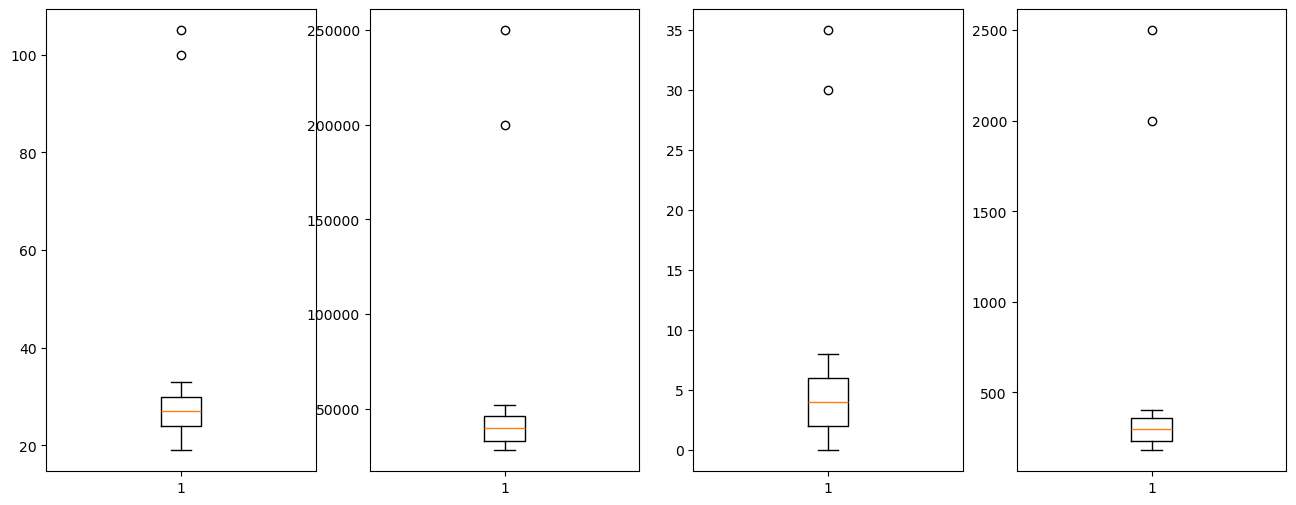

In [10]:
fig,axs=plt.subplots(1,4,figsize=(16,6))
axs[0].boxplot(data.Age)
axs[1].boxplot(data.Salary)
axs[2].boxplot(data.Experience)
axs[3].boxplot(data.Monthly_Sales)
plt.show()

In [11]:
data

,Age,Salary,Experience,Monthly_Sales
0,22,30000,1,200
1,25,32000,2,220
2,28,35000,3,250
3,30,40000,5,300
4,24,38000,4,280
5,27,36000,3,260
6,29,37000,4,270
7,31,39000,6,290
8,26,41000,5,310
9,23,42000,2,320


In [13]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1

In [14]:
IQR

Age                  6.0
Salary           13000.0
Experience           4.0
Monthly_Sales      130.0
dtype: float64

In [15]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [16]:
upper_limit, lower_limit

(Age                 39.0
 Salary           65500.0
 Experience          12.0
 Monthly_Sales      555.0
 dtype: float64,
 Age                 15.0
 Salary           13500.0
 Experience          -4.0
 Monthly_Sales       35.0
 dtype: float64)

In [18]:
 outliers=((data<lower_limit)|(data>upper_limit)).any(axis=1)
data[outliers]

,Age,Salary,Experience,Monthly_Sales
20,100,200000,30,2000
21,105,250000,35,2500


In [20]:
 outliers=((data<lower_limit)|(data>upper_limit)).any(axis=1)
cleaned_data=data[~outliers]

In [24]:
cleaned_data.head()

,Age,Salary,Experience,Monthly_Sales
0,22,30000,1,200
1,25,32000,2,220
2,28,35000,3,250
3,30,40000,5,300
4,24,38000,4,280


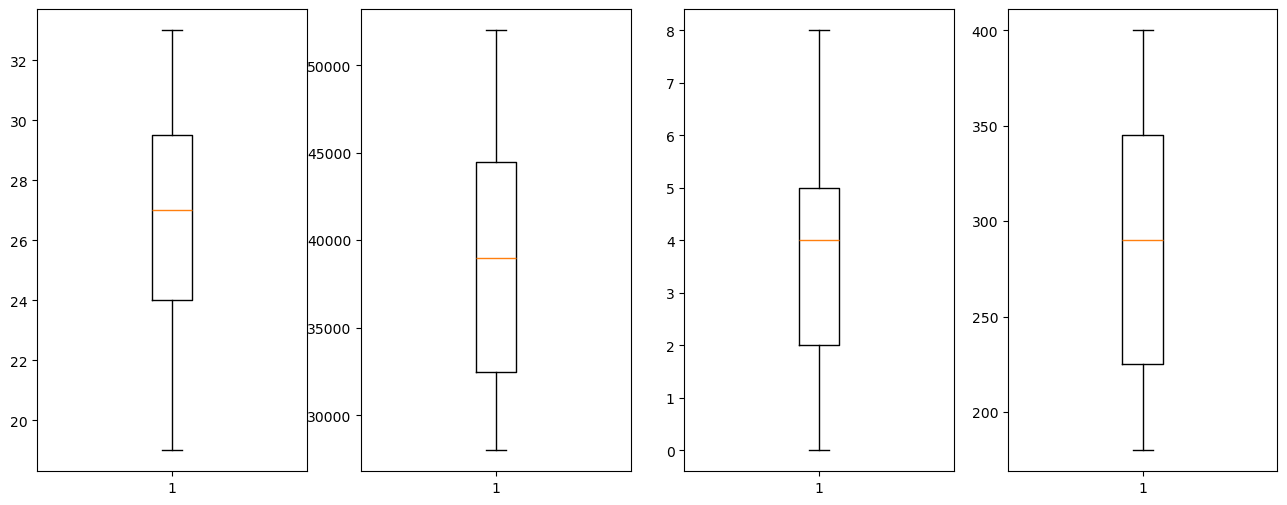

In [25]:
fig,axs=plt.subplots(1,4,figsize=(16,6))
axs[0].boxplot(cleaned_data.Age)
axs[1].boxplot(cleaned_data.Salary)
axs[2].boxplot(cleaned_data.Experience)
axs[3].boxplot(cleaned_data.Monthly_Sales)
plt.show()

In [51]:
data

,Unnamed: 0,Age,Salary,Experience,Monthly_Sales
0,0,22,30000,1,200
1,1,25,32000,2,220
2,2,28,35000,3,250
3,3,30,40000,5,300
4,4,24,38000,4,280
5,5,27,36000,3,260
6,6,29,37000,4,270
7,7,31,39000,6,290
8,8,26,41000,5,310
9,9,23,42000,2,320


In [55]:
z_score=np.absolute(zscore(data))
z_score_mask=(z_score>3).all(axis=1)

In [56]:
z_score

,Unnamed: 0,Age,Salary,Experience,Monthly_Sales
0,1.664101,0.510977,0.463728,0.617331,0.454254
1,1.525426,0.367444,0.424824,0.493865,0.417262
2,1.386750,0.223911,0.366469,0.370399,0.361775
3,1.248075,0.128223,0.269211,0.123466,0.269297
4,1.109400,0.415288,0.308114,0.246932,0.306288
5,0.970725,0.271756,0.347018,0.370399,0.343280
6,0.832050,0.176067,0.327566,0.246932,0.324784
7,0.693375,0.080378,0.288663,0.000000,0.287793
8,0.554700,0.319600,0.249759,0.123466,0.250801
9,0.416025,0.463133,0.230308,0.493865,0.232306


In [58]:
z_score_mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [59]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [60]:
data

,Age,Salary,Experience,Monthly_Sales
0,22,30000,1,200
1,25,32000,2,220
2,28,35000,3,250
3,30,40000,5,300
4,24,38000,4,280
5,27,36000,3,260
6,29,37000,4,270
7,31,39000,6,290
8,26,41000,5,310
9,23,42000,2,320


In [65]:
z_score=np.absolute(zscore(data))
z_score_mask=(z_score>3).any(axis=1)

In [66]:
z_score

,Age,Salary,Experience,Monthly_Sales
0,0.510977,0.463728,0.617331,0.454254
1,0.367444,0.424824,0.493865,0.417262
2,0.223911,0.366469,0.370399,0.361775
3,0.128223,0.269211,0.123466,0.269297
4,0.415288,0.308114,0.246932,0.306288
5,0.271756,0.347018,0.370399,0.343280
6,0.176067,0.327566,0.246932,0.324784
7,0.080378,0.288663,0.000000,0.287793
8,0.319600,0.249759,0.123466,0.250801
9,0.463133,0.230308,0.493865,0.232306


In [67]:
z_score_mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
21     True
22    False
23    False
24    False
dtype: bool

In [68]:
data[z_score_mask]

,Age,Salary,Experience,Monthly_Sales
20,100,200000,30,2000
21,105,250000,35,2500
